<div style="border: 10px solid RGB(0,0,0);" >
<div style=" background-color: RGB(51,153,153);" >
<h1 style="margin: auto; padding: 20px; color:#000; text-align: center">NOTEBOOK - Stéphane Srsa</h1>   
<h1 style="margin: auto; padding: 20px; color:#fff; text-align: center">PROJET 8</h1>
<h2 style="margin: auto; padding: 20px; color:#fff; text-align: center">Faire une étude sur l'eau potable </h2>
</div>

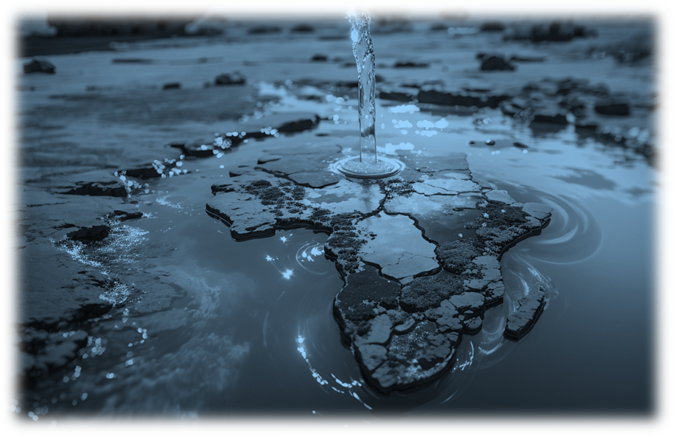

<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Importation des librairies</h3>
  </div>

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Importation des fichiers</h3>
  </div>

In [3]:
Population = pd.read_csv('Population.csv')
RegionCountry = pd.read_csv('RegionCountry.csv')
Stab_Politique = pd.read_csv('PoliticalStability.csv')
Mortalite = pd.read_csv('MortalityRateAttributedToWater.csv')
Eau_potable= pd.read_csv('BasicAndSafelyManagedDrinkingWaterServices.csv')
Country_Code = pd.read_csv('Countries_code_flags.csv', sep=';')

<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Création fonction</h3>
  </div>

In [4]:
# Fonction pour afficher des messages plus esthétiques
def Text_message(message):
    max_line_length = 100  # Longueur maximale d'une ligne avant de sauter à la ligne suivante
    lines = []
    current_line = ""

    for mot in message.split():
        if len(current_line + mot) <= max_line_length:
            current_line += mot + " "
        else:
            lines.append(current_line.strip())
            current_line = mot + " "
    
    # Ajoute la dernière ligne restante
    lines.append(current_line.strip())
    
    formatted_lines = "<br>".join(lines)
    styled_message = '<div style="text-align: left;"><span style="font-weight: bold; font-style: italic; font-family: Times New Roman;color: teal; font-size: 12pt; font-family: Arial;">{}</span></div>'.format(formatted_lines)
    display(HTML(styled_message))

In [5]:
# Informations sur les pays présents ou non sur les deux tables
def Pays_absents(DF1, DF2):
    display(DF1.head(2))
    pays_DF1 = DF1['Country'].unique()
    pays_presents = DF2['Country'].isin(pays_DF1)
    pays_absents = DF2[~pays_presents]
    print(pays_absents['Country'].unique())
    print(pays_absents.nunique())
    
    pays_DF2 = DF2['Country'].unique()
    pays_presents1 = DF1['Country'].isin(pays_DF2)
    pays_absents1 = DF1[~pays_presents1]    
    display(DF2.head(2))
    print(pays_absents1['Country'].unique())
    print(pays_absents1.nunique())
    

In [6]:
# Lecture des informations du fichier
def infos_DF(DF):
    display(DF.tail())
    message = "le fichier contient {:.0f} lignes et {} colonnes".format(DF.shape[0],DF.shape[1])
    Text_message(message)
    print('')
    DF.info()
    message = "Valeurs manquantes"
    Text_message(message)
    # Vérification valeurs manquantes
    print(DF.isnull().sum())
    message = "Valeurs uniques"
    Text_message(message)
    print(DF.nunique())

<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">1 - Fichier "Population"</h2>
</div>

In [7]:
# Lecture des informations du fichier
infos_DF(Population)

,Country,Granularity,Year,Population
20909,Zimbabwe,Total,2018,14438.802
20910,Zimbabwe,Male,2018,6879.119
20911,Zimbabwe,Female,2018,7559.693
20912,Zimbabwe,Rural,2018,11465.748
20913,Zimbabwe,Urban,2018,5447.513



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20914 entries, 0 to 20913
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      20914 non-null  object 
 1   Granularity  20914 non-null  object 
 2   Year         20914 non-null  int64  
 3   Population   20914 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 653.7+ KB


Country        0
Granularity    0
Year           0
Population     0
dtype: int64


Country          239
Granularity        5
Year              19
Population     20515
dtype: int64


In [8]:
# Mise à l'unité de 'population'
Population['Population'] = Population['Population']*1000
Population['Population']= Population['Population'].astype("int64")
Population.head(3)

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779953
1,Afghanistan,Male,2000,10689508
2,Afghanistan,Female,2000,10090449


In [9]:
# Vérification de la population mondiale en 2018 (7,63 milliards / Source: Planetoscope.com)
Population.loc[(Population['Granularity']=="Total") & (Population['Year']==2018)]['Population'].sum()

9090746132

In [10]:
Pays_absents(Population,Country_Code)

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779953
1,Afghanistan,Male,2000,10689508


['Bolivia' 'Cape Verde' 'Curacao' 'Federated States of Micronesia'
 'Hong Kong' 'Islamic Republic of Iran' 'Kosovo'
 'Occupied Palestinian Territory' 'Republic of North Macedonia'
 'Republic of the Congo' 'Saint-Martin' 'Sint Maarten'
 'The Democratic Republic Of The Congo' 'U.S. Virgin Islands'
 'United Kingdom' 'United Republic Of Tanzania' 'United States'
 'Venezuela' 'Vietnam']
Country Code     19
Pays             19
Country          19
Flag-lien URL    19
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Anguilla' 'Bolivia (Plurinational State of)'
 'Bonaire, Sint Eustatius and Saba' 'Cabo Verde' 'Channel Islands'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Congo' 'Curaçao'
 'Democratic Republic of the Congo' 'Falkland Islands (Malvinas)'
 'French Guyana' 'Guadeloupe' 'Holy See' 'Iran (Islamic Republic of)'
 'Martinique' 'Mayotte' 'Micronesia (Federated States of)' 'Montserrat'
 'Netherlands Antilles (former)' 'North Macedonia' 'Palestine' 'Réunion'
 'Saint Barthélemy' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Saint-Martin (French part)'
 'Serbia and Montenegro' 'Sint Maarten  (Dutch part)' 'Sudan (former)'
 'Tokelau' 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'United States Virgin Islands' 'Venezuela (Bolivarian Republic of)'
 'Viet Nam' 'Wallis and Futuna Islands' 'Western Sahara']
Country          41
Granularity       5
Year      

In [11]:
Concordance_pays = {
    'Congo': 'Republic of the Congo', 'Iran (Islamic Republic of)': 'Islamic Republic of Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'United Republic Of Tanzania', 'United States of America': 'United States',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Cabo Verde': 'Cape Verde', 
    'Democratic Republic of the Congo': 'The Democratic Republic Of The Congo',
    'Micronesia (Federated States of)': 'Federated States of Micronesia','Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam','Curaçao': 'Curacao', 'North Macedonia': 'Republic of North Macedonia', 
    'Palestine': 'Occupied Palestinian Territory','Saint-Martin (French part)': 'Saint-Martin',
    'Sint Maarten  (Dutch part)': 'Sint Maarten', 'United States Virgin Islands': 'U.S. Virgin Islands',
    }
Population['Country'] = Population['Country'].replace(Concordance_pays)

<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">2 - Fichier "RegionCountry"</h2>
</div>

In [12]:
# Lecture des informations du fichier
infos_DF(RegionCountry)

,REGION (DISPLAY),COUNTRY (DISPLAY)
189,Eastern Mediterranean,United Arab Emirates
190,Americas,Venezuela (Bolivarian Republic of)
191,Western Pacific,Viet Nam
192,Eastern Mediterranean,Yemen
193,Africa,Zimbabwe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION (DISPLAY)   194 non-null    object
 1   COUNTRY (DISPLAY)  194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


REGION (DISPLAY)     0
COUNTRY (DISPLAY)    0
dtype: int64


REGION (DISPLAY)       6
COUNTRY (DISPLAY)    194
dtype: int64


In [13]:
RegionCountry.rename(columns={"REGION (DISPLAY)":"Region", "COUNTRY (DISPLAY)":"Country"}, inplace = True)
RegionCountry.head(3)

,Region,Country
0,Europe,Albania
1,Europe,Andorra
2,Europe,Armenia


In [14]:
Pays_absents(RegionCountry,Country_Code)

,Region,Country
0,Europe,Albania
1,Europe,Andorra


['American Samoa' 'Aruba' 'Bermuda' 'Bolivia' 'British Virgin Islands'
 'Cape Verde' 'Cayman Islands' 'Curacao' 'Faroe Islands'
 'Federated States of Micronesia' 'French Polynesia' 'Gibraltar'
 'Greenland' 'Guam' 'Hong Kong' 'Islamic Republic of Iran' 'Isle of Man'
 'Kosovo' 'Liechtenstein' 'New Caledonia' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Puerto Rico' 'Republic of the Congo'
 'Saint-Martin' 'Sint Maarten' 'The Democratic Republic Of The Congo'
 'Turks and Caicos Islands' 'U.S. Virgin Islands' 'United Kingdom'
 'United Republic Of Tanzania' 'United States' 'Venezuela' 'Vietnam']
Country Code     34
Pays             34
Country          34
Flag-lien URL    34
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Congo' 'Iran (Islamic Republic of)'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Bolivia (Plurinational State of)' 'Cabo Verde'
 'Democratic Republic of the Congo' 'Micronesia (Federated States of)'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam']
Region      5
Country    11
dtype: int64


In [15]:
Concordance_pays = {
    'Congo': 'Republic of the Congo', 'Swaziland': 'Eswatini' ,'Iran (Islamic Republic of)': 'Islamic Republic of Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'United Republic Of Tanzania', 'United States of America': 'United States',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Cabo Verde': 'Cape Verde', 
    'Democratic Republic of the Congo': 'The Democratic Republic Of The Congo',
    'Micronesia (Federated States of)': 'Federated States of Micronesia','Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    }
RegionCountry['Country'] = RegionCountry['Country'].replace(Concordance_pays)

<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">on a 194 pays dans 'RégionCountry' et 239 dans 'Population'</h3>
  </div>

In [16]:
Pays_absents(RegionCountry,Population)

,Region,Country
0,Europe,Albania
1,Europe,Andorra


['American Samoa' 'Anguilla' 'Aruba' 'Bermuda'
 'Bonaire, Sint Eustatius and Saba' 'British Virgin Islands'
 'Cayman Islands' 'Channel Islands' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Curacao' 'Falkland Islands (Malvinas)' 'Faroe Islands' 'French Guyana'
 'French Polynesia' 'Gibraltar' 'Greenland' 'Guadeloupe' 'Guam' 'Holy See'
 'Isle of Man' 'Liechtenstein' 'Martinique' 'Mayotte' 'Montserrat'
 'Netherlands Antilles (former)' 'New Caledonia'
 'Northern Mariana Islands' 'Occupied Palestinian Territory' 'Puerto Rico'
 'Réunion' 'Saint Barthélemy'
 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Saint-Martin' 'Serbia and Montenegro'
 'Sint Maarten' 'Sudan (former)' 'Tokelau' 'Turks and Caicos Islands'
 'U.S. Virgin Islands' 'Wallis and Futuna Islands' 'Western Sahara']
Country          45
Granularity       5
Year             19
Population     2812
dtype: int64


,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779953
1,Afghanistan,Male,2000,10689508


[]
Region     0
Country    0
dtype: int64


<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">3 - Jointure des fichiers "RegionCountry" et "Population"</h2>
</div>

In [17]:
population_pays =pd.merge(Population, RegionCountry, on = 'Country', how = 'left')    

In [18]:
# Lecture des informations du fichier
infos_DF(population_pays)

,Country,Granularity,Year,Population,Region
20909,Zimbabwe,Total,2018,14438802,Africa
20910,Zimbabwe,Male,2018,6879119,Africa
20911,Zimbabwe,Female,2018,7559693,Africa
20912,Zimbabwe,Rural,2018,11465748,Africa
20913,Zimbabwe,Urban,2018,5447513,Africa



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20914 entries, 0 to 20913
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      20914 non-null  object
 1   Granularity  20914 non-null  object
 2   Year         20914 non-null  int64 
 3   Population   20914 non-null  int64 
 4   Region       17832 non-null  object
dtypes: int64(2), object(3)
memory usage: 980.3+ KB


Country           0
Granularity       0
Year              0
Population        0
Region         3082
dtype: int64


Country          239
Granularity        5
Year              19
Population     20514
Region             6
dtype: int64


In [19]:
Pays_absents(RegionCountry,population_pays)

,Region,Country
0,Europe,Albania
1,Europe,Andorra


['American Samoa' 'Anguilla' 'Aruba' 'Bermuda'
 'Bonaire, Sint Eustatius and Saba' 'British Virgin Islands'
 'Cayman Islands' 'Channel Islands' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Curacao' 'Falkland Islands (Malvinas)' 'Faroe Islands' 'French Guyana'
 'French Polynesia' 'Gibraltar' 'Greenland' 'Guadeloupe' 'Guam' 'Holy See'
 'Isle of Man' 'Liechtenstein' 'Martinique' 'Mayotte' 'Montserrat'
 'Netherlands Antilles (former)' 'New Caledonia'
 'Northern Mariana Islands' 'Occupied Palestinian Territory' 'Puerto Rico'
 'Réunion' 'Saint Barthélemy'
 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Saint-Martin' 'Serbia and Montenegro'
 'Sint Maarten' 'Sudan (former)' 'Tokelau' 'Turks and Caicos Islands'
 'U.S. Virgin Islands' 'Wallis and Futuna Islands' 'Western Sahara']
Country          45
Granularity       5
Year             19
Population     2812
Region            0
dtype: int64


,Country,Granularity,Year,Population,Region
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean


[]
Region     0
Country    0
dtype: int64


<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Traitement des provinces Chinoises et DOM TOM</h3>
  </div>

### Provinces Chinoises

In [20]:
# Liste des pays non renseignés (Region)
population_pays_SansRegion = population_pays[(population_pays['Region'].isna()) & (population_pays['Year'] == 2018) 
                & (population_pays['Granularity'] == 'Total')]
print(population_pays_SansRegion.shape)
population_pays_SansRegion

(43, 5)


,Country,Granularity,Year,Population,Region
339,American Samoa,Total,2018,55465,NaN
548,Anguilla,Total,2018,14731,NaN
926,Aruba,Total,2018,105845,NaN
2030,Bermuda,Total,2018,62756,NaN
2244,"Bonaire, Sint Eustatius and Saba",Total,2018,25711,NaN
2586,British Virgin Islands,Total,2018,29802,NaN
3403,Cayman Islands,Total,2018,64174,NaN
3686,Channel Islands,Total,2018,170499,NaN
3971,"China, Hong Kong SAR",Total,2018,7371730,NaN
4066,"China, Macao SAR",Total,2018,631636,NaN


In [21]:
# Population Chinoise toutes lignes cumulées
population_pays.loc[(population_pays['Granularity']=="Total") & (population_pays['Country'].str.contains('China')) 
                    & (population_pays['Year']==2018)]['Population'].sum()


2918755224

In [22]:
# Population Chinoise ligne 'China' seule
population_pays.loc[(population_pays['Granularity']=="Total") & (population_pays['Country'] == 'China') 
                    & (population_pays['Year']==2018)]['Population'].sum()

1459377612

In [23]:
# Population des provinces Chinoises sans la Chine
population_pays.loc[(population_pays['Granularity']=="Total") & (population_pays['Country'] !='China') 
                    & (population_pays['Country'].str.contains('China')) & (population_pays['Year']==2018)]['Population'].sum()

1459377612

### Nous avons déjà la population globale de la Chine, nous pouvons supprimer toutes les provinces

In [24]:
# Création d'un DF de sauvegarde des pays/provinces sans Région
Save_Pays_SansRegion = population_pays[(population_pays['Region'].isna())]
#Save_Pays_SansRegion.loc[(Save_Pays_SansRegion["Granularity"] == 'Total') & (Save_Pays_SansRegion["Year"] == 2018)]

In [25]:
# Suppression des provinces de Chine
population_pays = population_pays[~(population_pays['Region'].isna() & population_pays['Country'].str.contains('China'))]

In [26]:
# Total population sans les provinces Chinoises
population_pays.loc[(population_pays['Granularity']=="Total") & (population_pays['Year']==2018)]['Population'].sum()

7631368520

## Vérification DF

In [27]:
print(population_pays.nunique())
Save_Pays_SansRegion.nunique()

Country          235
Granularity        5
Year              19
Population     20172
Region             6
dtype: int64


Country          45
Granularity       5
Year             19
Population     2812
Region            0
dtype: int64

## DOM TOM

In [28]:
# Population Française / Source : Insee => 66 891 000 au 1er janvier 2018
population_pays.loc[(population_pays['Country'] == 'France') & (population_pays['Granularity']=="Total") 
                    & (population_pays['Year']==2018)]

,Country,Granularity,Year,Population,Region
6899,France,Total,2018,64990511,Europe


In [29]:
DOM_TOM = population_pays[(population_pays['Country'].isin(['Guadeloupe', 'Martinique', 'Saint Barthélemy',
           'Mayotte','Réunion', 'Wallis and Futuna Islands', 'Saint-Martin (French part)', 'Saint Pierre and Miquelon',
           'New Caledonia', 'French Guyana', 'French Polynesia' ])) & (population_pays['Granularity']=="Total") 
                & (population_pays['Year']==2018)]['Population'].sum()
DOM_TOM

2785514

In [30]:
Pop_France = population_pays.loc[(population_pays['Country'] == 'France') & (population_pays['Granularity']=="Total") 
                    & (population_pays['Year']==2018)]['Population'].sum()
Pop_France+DOM_TOM

67776025

In [31]:
# Vérification de la population mondiale en 2018 (7,63 milliards)
population_pays.loc[(population_pays['Granularity']=="Total") & (population_pays['Year']==2018)]['Population'].sum()

7631368520

## Création DF en supprimant toutes les pays/provinces sans Région

In [32]:
# Suppression des lignes non renseignées
population_pays_V1 = population_pays.dropna()

## Création DF en conservant toutes les pays/provinces sans Région (Sauf provinces chinoises)

In [33]:
population_pays_V1.loc[(population_pays_V1['Country'] == 'Eswatini')]

,Country,Granularity,Year,Population,Region
6315,Eswatini,Total,2000,1005435,Africa
6316,Eswatini,Male,2000,483483,Africa
6317,Eswatini,Female,2000,521948,Africa
6318,Eswatini,Rural,2000,820663,Africa
6319,Eswatini,Urban,2000,240805,Africa
...,...,...,...,...,...
6405,Eswatini,Total,2018,1136281,Africa
6406,Eswatini,Male,2018,555082,Africa
6407,Eswatini,Female,2018,581192,Africa
6408,Eswatini,Rural,2018,1060246,Africa


In [34]:
# Vérification de la population mondiale en 2018 (7,63 milliards)
population_pays_V1.loc[(population_pays_V1['Granularity']=="Total") & (population_pays_V1['Year']==2018)]['Population'].sum()

7618422464

In [35]:
print(population_pays.nunique())
print('*****************')
print(population_pays_V1.nunique())

Country          235
Granularity        5
Year              19
Population     20172
Region             6
dtype: int64
*****************
Country          194
Granularity        5
Year              19
Population     17728
Region             6
dtype: int64


In [36]:
print(population_pays.isnull().sum())
print('*****************')
population_pays_V1.isnull().sum()

Country           0
Granularity       0
Year              0
Population        0
Region         2702
dtype: int64
*****************


Country        0
Granularity    0
Year           0
Population     0
Region         0
dtype: int64

In [37]:
# Verification des pays non présents dans la table 'population_pays'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(population_pays,Country_Code)

,Country,Granularity,Year,Population,Region
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean


['Hong Kong' 'Kosovo']
Country Code     2
Pays             2
Country          2
Flag-lien URL    2
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Anguilla' 'Bonaire, Sint Eustatius and Saba' 'Channel Islands'
 'Falkland Islands (Malvinas)' 'French Guyana' 'Guadeloupe' 'Holy See'
 'Martinique' 'Mayotte' 'Montserrat' 'Netherlands Antilles (former)'
 'Réunion' 'Saint Barthélemy'
 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Serbia and Montenegro' 'Sudan (former)'
 'Tokelau' 'Wallis and Futuna Islands' 'Western Sahara']
Country          20
Granularity       5
Year             19
Population     1199
Region            0
dtype: int64


In [38]:
# Verification des pays non présents dans la table 'population_pays_V1'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(population_pays_V1,Country_Code)

,Country,Granularity,Year,Population,Region
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean


['American Samoa' 'Aruba' 'Bermuda' 'British Virgin Islands'
 'Cayman Islands' 'Curacao' 'Faroe Islands' 'French Polynesia' 'Gibraltar'
 'Greenland' 'Guam' 'Hong Kong' 'Isle of Man' 'Kosovo' 'Liechtenstein'
 'New Caledonia' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Puerto Rico' 'Saint-Martin'
 'Sint Maarten' 'Turks and Caicos Islands' 'U.S. Virgin Islands']
Country Code     23
Pays             23
Country          23
Flag-lien URL    23
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


[]
Country        0
Granularity    0
Year           0
Population     0
Region         0
dtype: int64


<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Jointure 'population_pays_V1' avec 'Country_Code'. Ajout des codes pays/ pays en français et lien image drapeau </h3>
  </div>

In [39]:
population_pays_V1 =pd.merge(population_pays_V1, Country_Code, on = 'Country', how = 'left')    

In [40]:
# Lecture des informations du fichier
infos_DF(population_pays_V1)

,Country,Granularity,Year,Population,Region,Country Code,Pays,Flag-lien URL
17827,Zimbabwe,Total,2018,14438802,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
17828,Zimbabwe,Male,2018,6879119,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
17829,Zimbabwe,Female,2018,7559693,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
17830,Zimbabwe,Rural,2018,11465748,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
17831,Zimbabwe,Urban,2018,5447513,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17832 entries, 0 to 17831
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        17832 non-null  object
 1   Granularity    17832 non-null  object
 2   Year           17832 non-null  int64 
 3   Population     17832 non-null  int64 
 4   Region         17832 non-null  object
 5   Country Code   17832 non-null  object
 6   Pays           17832 non-null  object
 7   Flag-lien URL  17832 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


Country          0
Granularity      0
Year             0
Population       0
Region           0
Country Code     0
Pays             0
Flag-lien URL    0
dtype: int64


Country            194
Granularity          5
Year                19
Population       17728
Region               6
Country Code       194
Pays               194
Flag-lien URL      194
dtype: int64


In [41]:
# Sauvegarde du fichier
population_pays_V1.to_excel('population_pays_V1.xlsx', index=False)

<div style="background-color: RGB(51,153,153);" >
<div style="border: 10px solid RGB(0,0,0);" >    
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0)">Jointure 'population_pays' avec 'Country_Code'. Ajout des codes pays/ pays en français et lien image drapeau </h3>
  </div>

In [42]:
population_pays =pd.merge(population_pays, Country_Code, on = 'Country', how = 'left')    

In [43]:
# Lecture des informations du fichier
infos_DF(population_pays)

,Country,Granularity,Year,Population,Region,Country Code,Pays,Flag-lien URL
20529,Zimbabwe,Total,2018,14438802,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
20530,Zimbabwe,Male,2018,6879119,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
20531,Zimbabwe,Female,2018,7559693,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
20532,Zimbabwe,Rural,2018,11465748,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...
20533,Zimbabwe,Urban,2018,5447513,Africa,ZWE,Zimbabwe,https://flagsoftheworld.info/wp-content/upload...



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20534 entries, 0 to 20533
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        20534 non-null  object
 1   Granularity    20534 non-null  object
 2   Year           20534 non-null  int64 
 3   Population     20534 non-null  int64 
 4   Region         17832 non-null  object
 5   Country Code   19196 non-null  object
 6   Pays           19196 non-null  object
 7   Flag-lien URL  19196 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


Country             0
Granularity         0
Year                0
Population          0
Region           2702
Country Code     1338
Pays             1338
Flag-lien URL    1338
dtype: int64


Country            235
Granularity          5
Year                19
Population       20172
Region               6
Country Code       215
Pays               215
Flag-lien URL      215
dtype: int64


In [44]:
Territoires_Pays = population_pays.loc[(population_pays['Pays'].isna()) & (population_pays['Year'] == 2018) 
                    & (population_pays['Granularity'] == 'Total')]
Territoires_Pays

,Country,Granularity,Year,Population,Region,Country Code,Pays,Flag-lien URL
548,Anguilla,Total,2018,14731,NaN,NaN,NaN,NaN
2244,"Bonaire, Sint Eustatius and Saba",Total,2018,25711,NaN,NaN,NaN,NaN
3686,Channel Islands,Total,2018,170499,NaN,NaN,NaN,NaN
6179,Falkland Islands (Malvinas),Total,2018,3234,NaN,NaN,NaN,NaN
6614,French Guyana,Total,2018,282938,NaN,NaN,NaN,NaN
7583,Guadeloupe,Total,2018,399848,NaN,NaN,NaN,NaN
8212,Holy See,Total,2018,801,NaN,NaN,NaN,NaN
11516,Martinique,Total,2018,375673,NaN,NaN,NaN,NaN
11801,Mayotte,Total,2018,259531,NaN,NaN,NaN,NaN
12267,Montserrat,Total,2018,4993,NaN,NaN,NaN,NaN


In [45]:
population_pays.to_excel('population_pays.xlsx', index=False)

In [46]:
a = Territoires_Pays['Population'].sum()
a

3300050

In [47]:
b = population_pays.loc[(population_pays['Year'] == 2018) & (population_pays['Granularity'] == 'Total')]['Population'].sum()
b

7631368520

In [48]:
b - a 

7628068470

<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">4- Fichier "Mortalite"</h2>
</div>

In [49]:
# Lecture des informations du fichier
infos_DF(Mortalite)

,Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
544,2016,Zambia,Male,36.61913,NaN
545,2016,Zambia,Total,34.91273,5792.504
546,2016,Zimbabwe,Female,22.16388,NaN
547,2016,Zimbabwe,Male,27.06688,NaN
548,2016,Zimbabwe,Total,24.55074,3965.033



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           549 non-null    int64  
 1   Country                                                        549 non-null    object 
 2   Granularity                                                    549 non-null    object 
 3   Mortality rate attributed to exposure to unsafe WASH services  549 non-null    float64
 4   WASH deaths                                                    183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.6+ KB


Year                                                               0
Country                                                            0
Granularity                                                        0
Mortality rate attributed to exposure to unsafe WASH services      0
WASH deaths                                                      366
dtype: int64


Year                                                               1
Country                                                          183
Granularity                                                        3
Mortality rate attributed to exposure to unsafe WASH services    548
WASH deaths                                                      183
dtype: int64


In [50]:
# Verification des pays non présents dans la table 'Mortalite'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Mortalite,Country_Code)

,Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN


['American Samoa' 'Andorra' 'Aruba' 'Bermuda' 'Bolivia'
 'British Virgin Islands' 'Cape Verde' 'Cayman Islands' 'Cook Islands'
 'Curacao' 'Dominica' 'Faroe Islands' 'Federated States of Micronesia'
 'French Polynesia' 'Gibraltar' 'Greenland' 'Guam' 'Hong Kong'
 'Islamic Republic of Iran' 'Isle of Man' 'Kosovo' 'Liechtenstein'
 'Marshall Islands' 'Monaco' 'Nauru' 'New Caledonia' 'Niue'
 'Northern Mariana Islands' 'Occupied Palestinian Territory' 'Palau'
 'Puerto Rico' 'Republic of the Congo' 'Saint Kitts and Nevis'
 'Saint-Martin' 'San Marino' 'Sint Maarten'
 'The Democratic Republic Of The Congo' 'Turks and Caicos Islands'
 'Tuvalu' 'U.S. Virgin Islands' 'United Kingdom'
 'United Republic Of Tanzania' 'United States' 'Venezuela' 'Vietnam']
Country Code     45
Pays             45
Country          45
Flag-lien URL    45
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Bolivia (Plurinational State of)' 'Cabo Verde' 'Congo'
 'Democratic Republic of the Congo' 'Iran (Islamic Republic of)'
 'Micronesia (Federated States of)'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam']
Year                                                              1
Country                                                          11
Granularity                                                       3
Mortality rate attributed to exposure to unsafe WASH services    33
WASH deaths                                                      11
dtype: int64


In [51]:
Concordance_pays = {
    'Congo': 'Republic of the Congo', 'Iran (Islamic Republic of)': 'Islamic Republic of Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'United Republic Of Tanzania', 'United States of America': 'United States',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Cabo Verde': 'Cape Verde', 
    'Democratic Republic of the Congo': 'The Democratic Republic Of The Congo',
    'Micronesia (Federated States of)': 'Federated States of Micronesia','Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    }
Mortalite['Country'] = Mortalite['Country'].replace(Concordance_pays)

In [52]:
# Verification des pays non présents dans la table 'Mortalite'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Mortalite,Country_Code)

,Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN


['American Samoa' 'Andorra' 'Aruba' 'Bermuda' 'British Virgin Islands'
 'Cayman Islands' 'Cook Islands' 'Curacao' 'Dominica' 'Faroe Islands'
 'French Polynesia' 'Gibraltar' 'Greenland' 'Guam' 'Hong Kong'
 'Isle of Man' 'Kosovo' 'Liechtenstein' 'Marshall Islands' 'Monaco'
 'Nauru' 'New Caledonia' 'Niue' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Palau' 'Puerto Rico'
 'Saint Kitts and Nevis' 'Saint-Martin' 'San Marino' 'Sint Maarten'
 'Turks and Caicos Islands' 'Tuvalu' 'U.S. Virgin Islands']
Country Code     34
Pays             34
Country          34
Flag-lien URL    34
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


[]
Year                                                             0
Country                                                          0
Granularity                                                      0
Mortality rate attributed to exposure to unsafe WASH services    0
WASH deaths                                                      0
dtype: int64


In [53]:
# Sauvegarde du fichier
Mortalite.to_excel('Mortalite.xlsx', index=False)

<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">5- Fichier "Eau_potable"</h2>
</div>

In [54]:
# Lecture des informations du fichier
infos_DF(Eau_potable)

,Year,Country,Granularity,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
10471,2017,Zambia,Total,59.96376,NaN
10472,2017,Zambia,Urban,83.86312,46.24515
10473,2017,Zimbabwe,Rural,49.80476,NaN
10474,2017,Zimbabwe,Total,64.05123,NaN
10475,2017,Zimbabwe,Urban,93.99767,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         10476 non-null  int64  
 1   Country                                                      10476 non-null  object 
 2   Granularity                                                  10476 non-null  object 
 3   Population using at least basic drinking-water services (%)  9415 non-null   float64
 4   Population using safely managed drinking-water services (%)  3286 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 409.3+ KB


Year                                                              0
Country                                                           0
Granularity                                                       0
Population using at least basic drinking-water services (%)    1061
Population using safely managed drinking-water services (%)    7190
dtype: int64


Year                                                             18
Country                                                         194
Granularity                                                       3
Population using at least basic drinking-water services (%)    7704
Population using safely managed drinking-water services (%)    2877
dtype: int64


In [55]:
# Verification des pays non présents dans la table 'Eau_potable'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Eau_potable,Country_Code)

,Year,Country,Granularity,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,2000,Afghanistan,Rural,21.61913,NaN
1,2000,Afghanistan,Total,27.77190,NaN


['American Samoa' 'Aruba' 'Bermuda' 'Bolivia' 'British Virgin Islands'
 'Cape Verde' 'Cayman Islands' 'Curacao' 'Faroe Islands'
 'Federated States of Micronesia' 'French Polynesia' 'Gibraltar'
 'Greenland' 'Guam' 'Hong Kong' 'Islamic Republic of Iran' 'Isle of Man'
 'Kosovo' 'Liechtenstein' 'New Caledonia' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Puerto Rico' 'Republic of the Congo'
 'Saint-Martin' 'Sint Maarten' 'The Democratic Republic Of The Congo'
 'Turks and Caicos Islands' 'U.S. Virgin Islands' 'United Kingdom'
 'United Republic Of Tanzania' 'United States' 'Venezuela' 'Vietnam']
Country Code     34
Pays             34
Country          34
Flag-lien URL    34
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Bolivia (Plurinational State of)' 'Cabo Verde' 'Congo'
 'Democratic Republic of the Congo' 'Iran (Islamic Republic of)'
 'Micronesia (Federated States of)'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam']
Year                                                            18
Country                                                         11
Granularity                                                      3
Population using at least basic drinking-water services (%)    403
Population using safely managed drinking-water services (%)    134
dtype: int64


In [56]:
Concordance_pays = {
    'Congo': 'Republic of the Congo', 'Iran (Islamic Republic of)': 'Islamic Republic of Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'United Republic Of Tanzania', 'United States of America': 'United States',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Cabo Verde': 'Cape Verde', 
    'Democratic Republic of the Congo': 'The Democratic Republic Of The Congo',
    'Micronesia (Federated States of)': 'Federated States of Micronesia','Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    }
Eau_potable['Country'] = Eau_potable['Country'].replace(Concordance_pays)

In [57]:
# Verification des pays non présents dans la table 'Eau_potable'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Eau_potable,Country_Code)

,Year,Country,Granularity,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,2000,Afghanistan,Rural,21.61913,NaN
1,2000,Afghanistan,Total,27.77190,NaN


['American Samoa' 'Aruba' 'Bermuda' 'British Virgin Islands'
 'Cayman Islands' 'Curacao' 'Faroe Islands' 'French Polynesia' 'Gibraltar'
 'Greenland' 'Guam' 'Hong Kong' 'Isle of Man' 'Kosovo' 'Liechtenstein'
 'New Caledonia' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Puerto Rico' 'Saint-Martin'
 'Sint Maarten' 'Turks and Caicos Islands' 'U.S. Virgin Islands']
Country Code     23
Pays             23
Country          23
Flag-lien URL    23
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


[]
Year                                                           0
Country                                                        0
Granularity                                                    0
Population using at least basic drinking-water services (%)    0
Population using safely managed drinking-water services (%)    0
dtype: int64


In [58]:
# Sauvegarde du fichier
Eau_potable.to_excel('Eau_potable.xlsx', index=False)

<div style="border: 10px solid RGB(51,153,153;" >
<div style="background-color: RGB(0,0,0);" >
<h2 style="margin: auto; padding: 20px; color:RGB(51,153,153); "name="C1">6- Fichier "Stab_Politique"</h2>
</div>

In [59]:
# Lecture des informations du fichier
infos_DF(Stab_Politique)

,Country,Year,Political_Stability,Granularity
3521,Zimbabwe,2014,-0.71,Total
3522,Zimbabwe,2015,-0.62,Total
3523,Zimbabwe,2016,-0.62,Total
3524,Zimbabwe,2017,-0.71,Total
3525,Zimbabwe,2018,-0.71,Total



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3526 non-null   object 
 1   Year                 3526 non-null   int64  
 2   Political_Stability  3526 non-null   float64
 3   Granularity          3526 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 110.3+ KB


Country                0
Year                   0
Political_Stability    0
Granularity            0
dtype: int64


Country                200
Year                    18
Political_Stability    444
Granularity              1
dtype: int64


In [60]:
Stab_Politique

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total
...,...,...,...,...
3521,Zimbabwe,2014,-0.71,Total
3522,Zimbabwe,2015,-0.62,Total
3523,Zimbabwe,2016,-0.62,Total
3524,Zimbabwe,2017,-0.71,Total


In [61]:
# Ajout de l'année 2001 afin de préparer la correspondance des jointures futures
df = Stab_Politique

# DataFrame pour l'année 2001
Annee_2001 = {'Country': Stab_Politique['Country'].unique(),'Year': 2001,'Political_Stability': None,'Granularity': 'Total'}
Annee_2001 = pd.DataFrame(Annee_2001)

# Concaténer 'Annee_2001' avec 'Stab_Politique'
Stab_Politique = pd.concat([Stab_Politique, Annee_2001], ignore_index=True)

# Tri du DF par pays et année
Stab_Politique = Stab_Politique.sort_values(by=['Country', 'Year']).reset_index(drop=True)


Stab_Politique


,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2001,None,Total
2,Afghanistan,2002,-2.04,Total
3,Afghanistan,2003,-2.2,Total
4,Afghanistan,2004,-2.3,Total
...,...,...,...,...
3721,Zimbabwe,2014,-0.71,Total
3722,Zimbabwe,2015,-0.62,Total
3723,Zimbabwe,2016,-0.62,Total
3724,Zimbabwe,2017,-0.71,Total


In [62]:
# Verification des pays non présents dans la table 'Stab_Politique'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Stab_Politique,Country_Code)

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2001,None,Total


['Aruba' 'Bolivia' 'British Virgin Islands' 'Cape Verde' 'Cayman Islands'
 'China' 'Curacao' 'Faroe Islands' 'Federated States of Micronesia'
 'French Polynesia' 'Gibraltar' 'Guam' 'Hong Kong'
 'Islamic Republic of Iran' 'Isle of Man' 'Kosovo' 'Liechtenstein'
 'Monaco' 'New Caledonia' 'Northern Mariana Islands'
 'Occupied Palestinian Territory' 'Republic of North Macedonia'
 'Republic of the Congo' 'Saint-Martin' 'San Marino' 'Sint Maarten'
 'The Democratic Republic Of The Congo' 'Turks and Caicos Islands'
 'U.S. Virgin Islands' 'United Kingdom' 'United Republic Of Tanzania'
 'United States' 'Venezuela' 'Vietnam']
Country Code     34
Pays             34
Country          34
Flag-lien URL    34
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['Bolivia (Plurinational State of)' 'Cabo Verde' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, Taiwan Province of' 'China, mainland' 'Congo'
 'Democratic Republic of the Congo' 'Iran (Islamic Republic of)'
 'Micronesia (Federated States of)' 'North Macedonia' 'Palestine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam']
Country                 17
Year                    19
Political_Stability    198
Granularity              1
dtype: int64


In [63]:
Concordance_pays = {
    'Congo': 'Republic of the Congo', 'Iran (Islamic Republic of)': 'Islamic Republic of Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'United Republic Of Tanzania', 'United States of America': 'United States',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Cabo Verde': 'Cape Verde', 
    'Democratic Republic of the Congo': 'The Democratic Republic Of The Congo',
    'Micronesia (Federated States of)': 'Federated States of Micronesia','Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam', 'North Macedonia': 'Republic of North Macedonia',
    'Palestine': 'Occupied Palestinian Territory', 'China, mainland': 'China'
    }
Stab_Politique['Country'] = Stab_Politique['Country'].replace(Concordance_pays)

In [64]:
# Verification des pays non présents dans la table 'Stab_Politique'
# Verification des pays non présents dans la table 'Country_Code'
Pays_absents(Stab_Politique,Country_Code)

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2001,None,Total


['Aruba' 'British Virgin Islands' 'Cayman Islands' 'Curacao'
 'Faroe Islands' 'French Polynesia' 'Gibraltar' 'Guam' 'Hong Kong'
 'Isle of Man' 'Kosovo' 'Liechtenstein' 'Monaco' 'New Caledonia'
 'Northern Mariana Islands' 'Saint-Martin' 'San Marino' 'Sint Maarten'
 'Turks and Caicos Islands' 'U.S. Virgin Islands']
Country Code     20
Pays             20
Country          20
Flag-lien URL    20
dtype: int64


,Country Code,Pays,Country,Flag-lien URL
0,AFG,Afghanistan,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,ALB,Albanie,Albania,https://flagsoftheworld.info/wp-content/upload...


['China, Hong Kong SAR' 'China, Macao SAR' 'China, Taiwan Province of']
Country                 3
Year                   19
Political_Stability    43
Granularity             1
dtype: int64


In [65]:
Stab_Politique.loc[(Stab_Politique['Country'].str.contains('China')) & (Stab_Politique['Year']==2018)]

,Country,Year,Political_Stability,Granularity
718,"China, Hong Kong SAR",2018,0.79,Total
737,"China, Macao SAR",2018,1.26,Total
756,"China, Taiwan Province of",2018,0.85,Total
775,China,2018,-0.26,Total


In [66]:
# Sauvegarde du fichier
Stab_Politique.to_excel('Stab_Politique.xlsx', index=False)

In [67]:
# Verification des pays non présents dans la table 'Stab_Politique'
# Verification des pays non présents dans la table 'population_pays_V1'
Pays_absents(Stab_Politique,population_pays)

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2001,None,Total


['Anguilla' 'Aruba' 'Bonaire, Sint Eustatius and Saba'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands' 'Curacao'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'French Guyana'
 'French Polynesia' 'Gibraltar' 'Guadeloupe' 'Guam' 'Holy See'
 'Isle of Man' 'Liechtenstein' 'Martinique' 'Mayotte' 'Monaco'
 'Montserrat' 'Netherlands Antilles (former)' 'New Caledonia'
 'Northern Mariana Islands' 'Réunion' 'Saint Barthélemy'
 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Saint-Martin' 'San Marino'
 'Serbia and Montenegro' 'Sint Maarten' 'Sudan (former)' 'Tokelau'
 'Turks and Caicos Islands' 'U.S. Virgin Islands'
 'Wallis and Futuna Islands' 'Western Sahara']
Country            38
Granularity         5
Year               19
Population       2221
Region              1
Country Code       18
Pays               18
Flag-lien URL      18
dtype: int64


,Country,Granularity,Year,Population,Region,Country Code,Pays,Flag-lien URL
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean,AFG,Afghanistan,https://flagsoftheworld.info/wp-content/upload...
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean,AFG,Afghanistan,https://flagsoftheworld.info/wp-content/upload...


['China, Hong Kong SAR' 'China, Macao SAR' 'China, Taiwan Province of']
Country                 3
Year                   19
Political_Stability    43
Granularity             1
dtype: int64
